In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
data1 = pd.read_csv(r"/content/Final_output_FirstTrial.csv")

In [131]:
len(data1["Comments"].unique())

1031

In [129]:
comments_count = data1.groupby('Post')['Comments'].count().reset_index()
comments_count.columns = ['posts', 'num_comments']

In [130]:
comments_count

,posts,num_comments
0,!! Elk jaar overlijden er in Nederland naar sc...,1
1,"""Mijn man en ik kwamen hier 12 jaar geleden wo...",4
2,"""Onze medewerkers bouwen iedere dag met liefde...",1
3,"""Weet je, negen van de tien keer gebeurt er ni...",2
4,#WERK | Wil jij meewerken aan de toekomst van ...,1
...,...,...
715,Zijn jouw inkomsten laag en is je energiereken...,2
716,Zoekt u een kleinere woning omdat uw kinderen ...,1
717,Zwolse filmmakers zijn de afgelopen tijd druk ...,1
718,https://www.prowonen.nl/over-prowonen/nieuws-e...,1


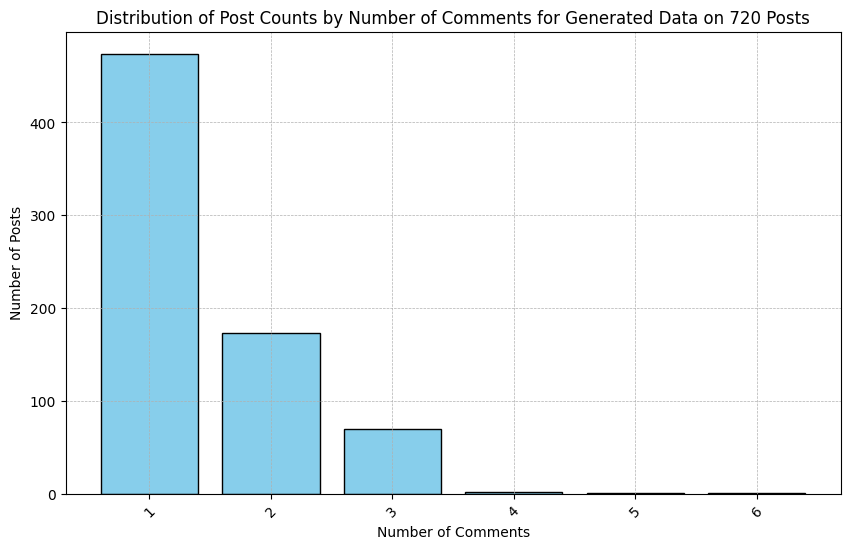

In [132]:
comment_distribution = comments_count['num_comments'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(comment_distribution.index, comment_distribution.values,color='skyblue', edgecolor='black')
plt.title('Distribution of Post Counts by Number of Comments for Generated Data on 720 Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [133]:
comments_count["num_comments"].sum()

1046

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


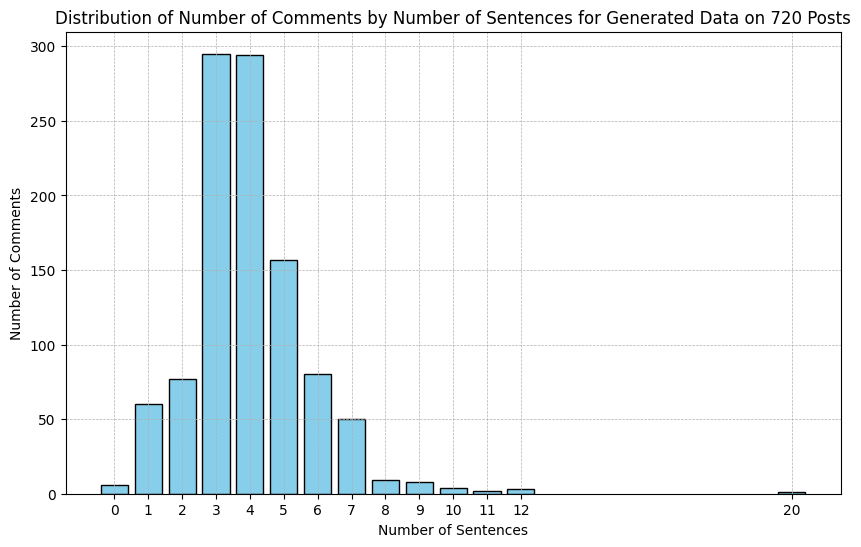

In [135]:
import nltk

nltk.download('punkt')

# Tokenize each comment into sentences and count the number of sentences
data1['num_sentences'] = data1['Comments'].apply(lambda x: len(nltk.sent_tokenize(str(x))))

# Count the number of comments for each number of sentences
comments_per_sentence = data1.groupby('num_sentences').size()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(comments_per_sentence.index, comments_per_sentence.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Comments by Number of Sentences for Generated Data on 720 Posts')
plt.xlabel('Number of Sentences')
plt.ylabel('Number of Comments')
plt.xticks(comments_per_sentence.index)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [137]:

# Flatten the list of sentences and calculate the word count for each sentence
data1['word_count'] = data1['Comments'].apply(lambda x: len(nltk.word_tokenize(x)))

min_word_count = data1['word_count'].min()
max_word_count = data1['word_count'].max()

min_word_count_comments = data1[data1['word_count'] == min_word_count].shape[0]
max_word_count_comments = data1[data1['word_count'] == max_word_count].shape[0]

min_word_count,max_word_count,min_word_count_comments,max_word_count_comments


(0, 156, 6, 2)

In [138]:
word_count_distribution = data1['word_count'].value_counts().sort_index()

# Print the distribution
print(word_count_distribution)

word_count
0       6
1      20
2      10
3       4
4       5
       ..
149     1
151     1
152     1
155     1
156     2
Name: count, Length: 146, dtype: int64


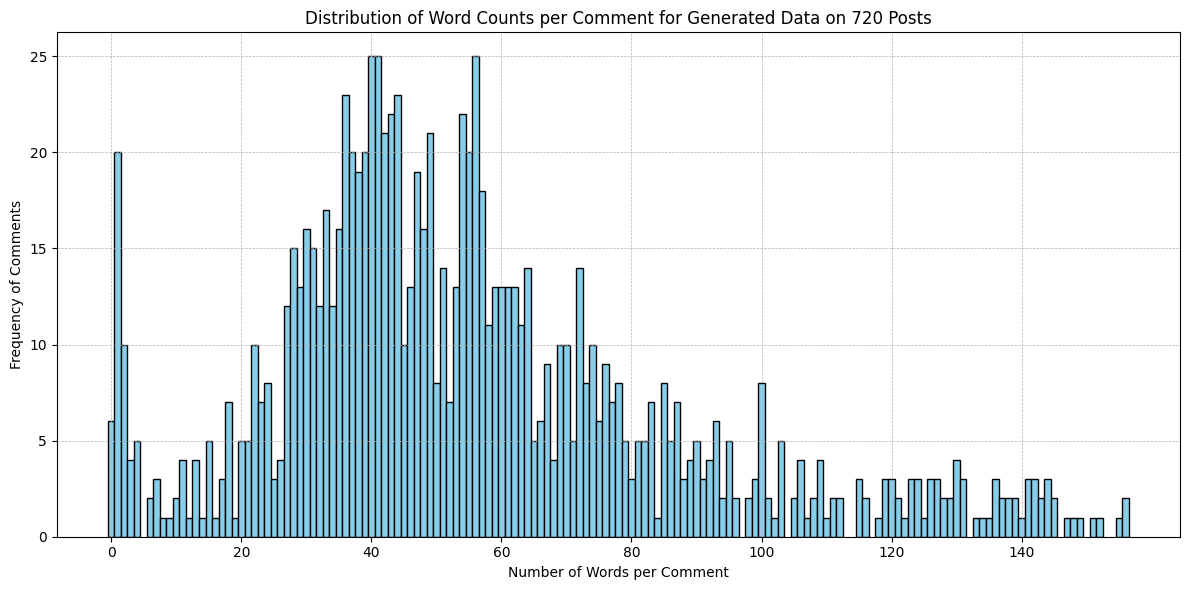

In [140]:


# Plot the histogram of word counts
plt.figure(figsize=(12, 6))
plt.bar(word_count_distribution.index, word_count_distribution.values,color='skyblue', edgecolor='black', width=1)
plt.title('Distribution of Word Counts per Comment for Generated Data on 720 Posts')
plt.xlabel('Number of Words per Comment')
plt.ylabel('Frequency of Comments')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(range(0, max(data1['word_count']) + 1, 20))
plt.tight_layout()
plt.show()

(1, 374, 94, 1)

word_count
1       94
2      334
3      218
4      188
5      182
      ... 
278      1
301      1
311      1
362      1
374      1
Name: count, Length: 168, dtype: int64
